Epoch 1/100
960/960 [==============================] - 4s 5ms/step - loss: 0.7976 - accuracy: 0.7416 - val_loss: 0.5280 - val_accuracy: 0.8131
Epoch 2/100
960/960 [==============================] - 4s 5ms/step - loss: 0.4940 - accuracy: 0.8263 - val_loss: 0.4715 - val_accuracy: 0.8317
Epoch 3/100
960/960 [==============================] - 4s 5ms/step - loss: 0.4442 - accuracy: 0.8434 - val_loss: 0.4455 - val_accuracy: 0.8437
Epoch 4/100
960/960 [==============================] - 4s 4ms/step - loss: 0.4101 - accuracy: 0.8555 - val_loss: 0.4188 - val_accuracy: 0.8487
Epoch 5/100
960/960 [==============================] - 4s 5ms/step - loss: 0.3863 - accuracy: 0.8629 - val_loss: 0.3853 - val_accuracy: 0.8636
Epoch 6/100
960/960 [==============================] - 4s 4ms/step - loss: 0.3680 - accuracy: 0.8689 - val_loss: 0.3754 - val_accuracy: 0.8676
Epoch 7/100
960/960 [==============================] - 4s 4ms/step - loss: 0.3511 - accuracy: 0.8755 - val_loss: 0.3632 - val_accuracy: 0.8710

Epoch 58/100
960/960 [==============================] - 4s 4ms/step - loss: 0.0705 - accuracy: 0.9754 - val_loss: 0.3726 - val_accuracy: 0.8947
Epoch 59/100
960/960 [==============================] - 4s 4ms/step - loss: 0.0674 - accuracy: 0.9760 - val_loss: 0.4079 - val_accuracy: 0.8881
Epoch 60/100
960/960 [==============================] - 4s 4ms/step - loss: 0.0689 - accuracy: 0.9756 - val_loss: 0.4437 - val_accuracy: 0.8853
Epoch 61/100
960/960 [==============================] - 4s 4ms/step - loss: 0.0655 - accuracy: 0.9770 - val_loss: 0.3807 - val_accuracy: 0.8962
Epoch 62/100
960/960 [==============================] - 4s 4ms/step - loss: 0.0634 - accuracy: 0.9780 - val_loss: 0.3879 - val_accuracy: 0.8967
Epoch 63/100
960/960 [==============================] - 4s 4ms/step - loss: 0.0608 - accuracy: 0.9785 - val_loss: 0.4301 - val_accuracy: 0.8899
Epoch 64/100
960/960 [==============================] - 4s 4ms/step - loss: 0.0591 - accuracy: 0.9800 - val_loss: 0.3992 - val_accuracy:

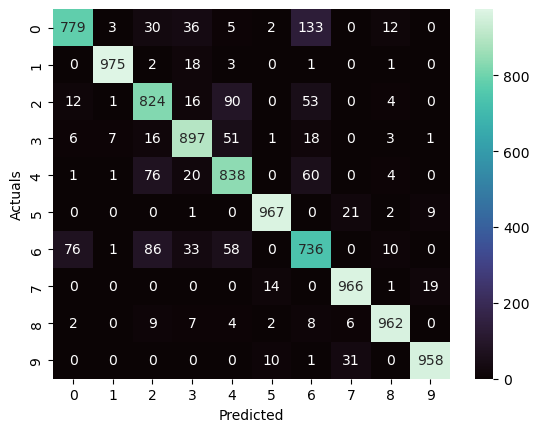

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

num_classes = 10

# Load the Fashion-MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

simple_model_smaller_batch = Sequential()
# input_shape=(img_rows*img_cols*channels,),
simple_model_smaller_batch.add(Flatten(input_shape=(28, 28)))
simple_model_smaller_batch.add(Dense(1024, activation='relu'))
simple_model_smaller_batch.add(Dense(512, activation='relu'))
simple_model_smaller_batch.add(Dense(256, activation='relu'))
simple_model_smaller_batch.add(Dense(128, activation='relu'))
simple_model_smaller_batch.add(Dense(10, activation='softmax'))

simple_model_smaller_batch.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
# simple_model_smaller_batch_history = simple_model_smaller_batch.fit(train_x, train_y, batch_size=50, epochs=50, validation_data=(test_x, test_y))
simple_model_smaller_batch_history = simple_model_smaller_batch.fit(x_train, y_train, batch_size=50, epochs=100, validation_split=0.2)

# Make predictions on the test set
test_pred = simple_model_smaller_batch.predict(x_test)
test_pred = np.argmax(test_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm1 = confusion_matrix(y_test, test_pred)
print(cm1)

# Now we evaluate the model using confusion matrix for this test dataset
sns.heatmap(cm1, annot=True, cmap='mako', fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals')

# Get the accuracy score
test_accuracy = round(100 * accuracy_score(y_test, test_pred), 2)
print(test_accuracy)

labels = ['Tees','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker', 'Bag', 'Ankle boots']

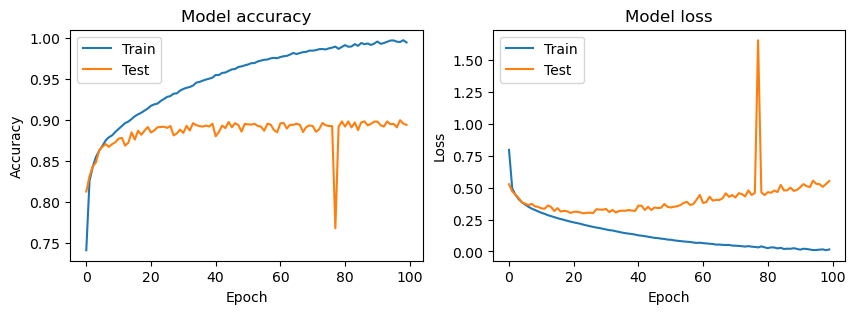

In [7]:
import matplotlib.pyplot as plt
def plot_history(history, title):
#     print(history.history)
    plt.figure(figsize=(10,3))
    # Plot training & validation accuracy values
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
plot_history(simple_model_smaller_batch_history, 'Simple NN with 100 batch size')